<a href="https://colab.research.google.com/github/Laiba-saeed92/Machine_learning_projects/blob/main/Bangalore_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split


**Importing Dataset**

In [22]:
df=pd.read_csv('bangalore house price prediction cleaned.csv')


In [23]:
df.head() #to check first five rows

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7120 entries, 0 to 7119
Columns: 108 entries, bath to location_Tumkur Road
dtypes: float64(5), int64(103)
memory usage: 5.9 MB


In [24]:
df.describe() #will tell the mean, count, std etc of each column

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
count,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,...,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000
mean,2.390871,1.572759,96.454991,1479.729806,2.465169,5923.806855,0.750702,0.182303,0.061938,0.792697,...,0.003090,0.003090,0.002949,0.002949,0.002949,0.002949,0.002809,0.002809,0.002809,0.002809
std,0.876822,0.770583,116.185034,913.779769,0.841520,2556.650935,0.432637,0.386121,0.241060,0.405403,...,0.055505,0.055505,0.054232,0.054232,0.054232,0.054232,0.052929,0.052929,0.052929,0.052929
min,1.000000,0.000000,10.000000,350.000000,1.000000,1250.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,49.230000,1100.000000,2.000000,4416.761042,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,2.000000,69.000000,1255.000000,2.000000,5417.855613,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,2.000000,104.000000,1640.250000,3.000000,6618.285651,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,3.000000,2912.000000,30400.000000,9.000000,35000.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Split dataset into features and target label**

In [25]:
X=df.drop('price', axis=1)
y=df['price']
print('Shape of X:', X.shape) #shape will tell us about the no of rows and columns in X and y
print('Shape of y:', y.shape)


Shape of X: (7120, 107)
Shape of y: (7120,)


In [26]:
#splitting data into training, testing data
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5696, 107) (1424, 107) (5696,) (1424,)


**Random Forest Regression- ML model**

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=500, criterion='squared_error')
regressor=rf.fit(X_train, y_train)



**Predict X_train data**

In [40]:
y_pred_train=regressor.predict(X_train)
result = np.concatenate((y_pred_train.reshape(-1, 1), y_train.to_numpy().reshape(-1, 1)), axis=1)
print(result)

[[ 82.0984   82.     ]
 [220.98    220.     ]
 [ 25.72858  25.     ]
 ...
 [ 45.8592   45.79   ]
 [400.702   399.     ]
 [ 72.87964  73.     ]]


**Visualizing the training data and evaluating the results**

In [43]:
#Evaluating the results
r2_value_train=r2_score(y_train,y_pred_train)
print('R2 score:', r2_value_train)

R2 score: 0.9913061939313165


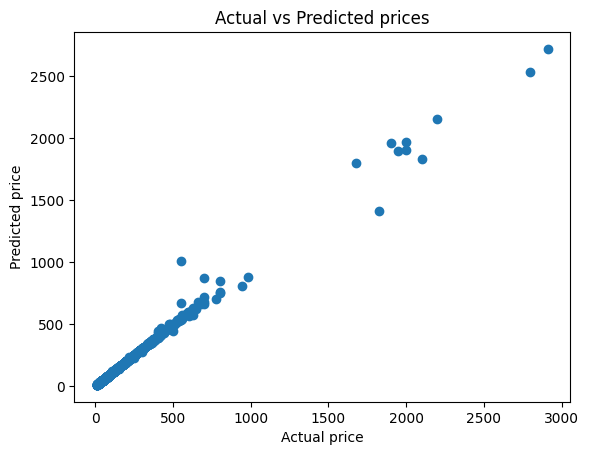

In [45]:
#Visualizing the training data
plt.scatter(y_train, y_pred_train)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs Predicted prices')
plt.show()

**Predict X_test data**

In [28]:
y_pred=regressor.predict(X_test)
# Reshape both arrays and concatenate
result = np.concatenate((y_pred.reshape(-1, 1), y_test.to_numpy().reshape(-1, 1)), axis=1)
 #reshape(-1, 1) ensures that the arrays are reshaped to have one column and the appropriate number of rows
print(result)

[[46.90776 47.     ]
 [59.7456  60.     ]
 [65.027   65.     ]
 ...
 [56.6209  56.5    ]
 [25.45538 26.     ]
 [49.14184 49.     ]]


**Evaluate the model**

In [34]:
r2_value=r2_score(y_test,y_pred)
print('R2 score:', r2_value)

R2 score: 0.9655098480906804


**Predict the price of a house**

In [36]:
X_test.iloc[-1,:] #DataFrame.iloc[row_index, column_index] #In Python, -1 refers to the last element in an array or DataFrame.
regressor.predict([X_test.iloc[-1,:]]) #: indicates all columns.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([49.14184])

**Actual y_test prediction**

In [31]:
y_test.iloc[-1]

np.float64(49.0)

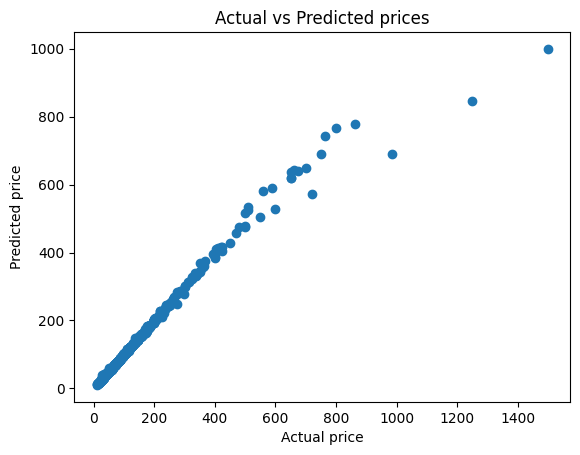

In [37]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs Predicted prices')
plt.show()